**Instructions**

The usual instructions apply about literal assignments.

In addition, please do not remove or modify the comments that appear in cells like:

> \# Code cell for Problem X

> \# Literal assignment cell for Problem X

**Binary trees for generating discrete random variables**

Suppose we are given a discrete distribution, specified by a  vector of probabilities 

$$
p=(p_0,p_1,\ldots,p_{n-1})
$$

where $p_i>0$ and $\sum_{i=0}^{n-1} p_i = 1.$

We want to generate a random variable $X$ such that 

$$
P[X=i] = p_i, \mbox{ for } i=0,\ldots,n-1.
$$

One method for doing this is to break up the unit interval into $n$ intervals:

$$I_0 = [0,p_0)$$
$$I_1=[p_0,p_0+p_1)$$
$$\vdots$$
$$I_{n-2} = [p_0+p_1+\ldots+p_{n-3},p_0+p_1+\ldots+p_{n-2})$$
$$I_{n-1} = [p_0+p_1+\ldots+p_{n-2},1]$$

Generate $U \sim \mbox{Uniform}(0,1)$ and take $X=i$ if $U$ lands in $I_i.$

There are a couple of reasons why this might not be so effective. 

First, deciding which interval $U$ lands in might be slow to determine.

Second, some of these intervals might be quite small in some cases and the RNG might not be very good at generating random variables with correct probabilities for small intervals.

**A test of the RNG**

If the distribution of $U$ is truly Uniform$(0,1)$ and $m$ is any positive integer, then it should be the case that $mU$ us uniformly distributed in $(0,m)$ and so the fractional part of $mU$ i.e. 

$$
V = mU - \lfloor mU \rfloor
$$

should be distributed as Uniform$(0,1).$

**Getting a histogram for a numpy array**

We can get a histogram of a numpy array using the pandas package.

We convert our numpy array to a pandas Series object and use the hist method.

Here is an example.

<AxesSubplot:>

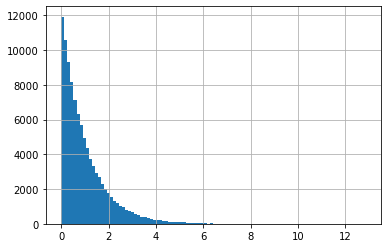

In [1]:
import numpy as np
import pandas as pd

u=np.random.uniform(0,1,100000)
x=-np.log(u)
pd.Series(x).hist(bins=100)

In the cell below, we generate 1.000,000 uniform random variables and try plotting a histogram of 

$$
X = 2^m U - \lfloor 2^m U \rfloor
$$

for large values of $m.$

Do the plot below for $m=40,41,42,\ldots,52$ to see how the RNG produces data that do not appear to be Uniform$(0,1)$ if $m$ is sufficiently large.

<AxesSubplot:>

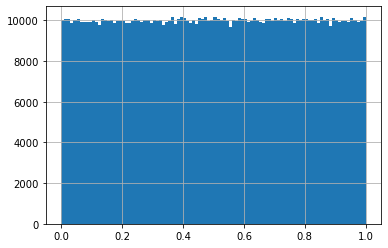

In [2]:
import numpy as np
import pandas as pd
U=np.random.uniform(0,1,1000000)
X=(2**40)*U
pd.Series(X-np.floor(X)).hist(bins=100)

**Using binary trees to sample a discrete distribution**

Given a distribution, we can use a binary tree to generate $X.$

To illustrate, suppose we take our probabilities to be 

p = [05, .07, .16, .18, .25, .29]

We can define a binary tree for generating a random variable $X$ according to this distribution shown here:

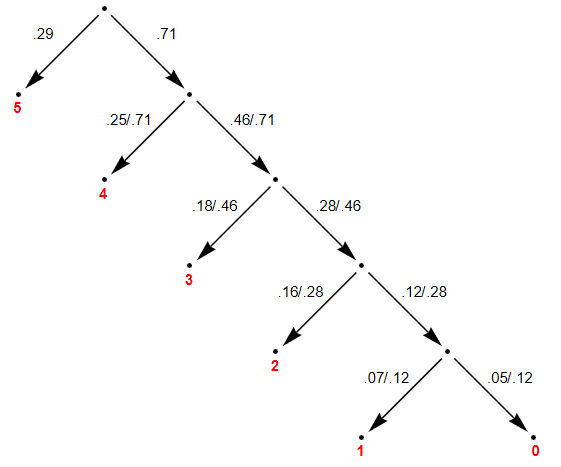

To use this tree, we start at the root node. Given that we reach a node that has children, we 

- generate a new uniform random variable $U$ independent of all previously generated random variables
- we use $U$ to decide which child to move to
- the edges are labeled with conditional probabilities of a move to a left or right child, given that we reach the current node
- if $U$ is less than the left probability, we move to the left child and otherwise we go to the right child

Once we reach a leaf node, we define $X$ to be the label (shown in red) at the leaf.

Convince yourself that this random variable's distribution is given by the probability vector $p.$

**Problem 1 (5 points)**

If we generate a random variable $X$ using the algorithm described above, let $N$ denote the (random) number of times we generate a uniform random variable. Calculate the expected value of $N.$

Use the following cell for your work and in the subsequent literal assignment cell, assign your answer as a literal float to the variable called **EN1**.

The usual rules apply to literal assignments - this variable should only be assigned a value in literal assignment cell and nowhere else in your notebook.

Note - you should be able to get an answer **analytically** i.e. **without using Monte-Carlo simulation.**

In [3]:
# Code cell for Problem 1
exp1 = 0.29 * 1 + 0.25 * 2 + 0.18 * 3 + 0.16 * 4 + 0.12 * 5
print(exp1)

2.5700000000000003


In [4]:
# Literal assignment cell for Problem 1.
EN1 = 2.5700000000000003

**An alternative tree**

Here is another tree that can be used to accomplish the same task.

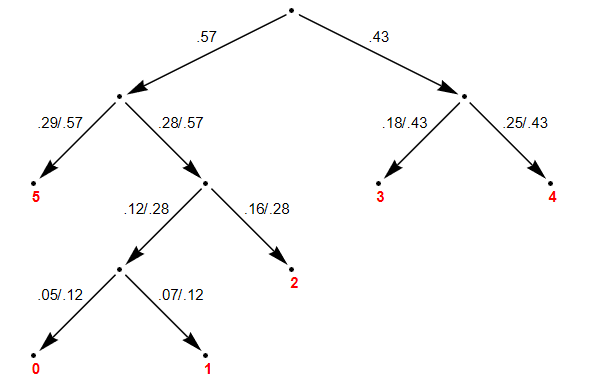

Convince yourself that if this tree is used in the manner described, we get a random variable $X$ with the same distribution as the one in Problem 1.

**Problem 2 (5 points)**

If we generate a random variable $X$ using the algorithm described above, but using this new tree let $N$ denote the (random) number of times we generate a uniform random variable. Calculate the expected value of $N.$

Use the following cell for your work and in the subsequent literal assignment cell, assign your answer as a literal float to the variable called **EN2**.

The usual rules apply to literal assignments - this variable should only be assigned a value in literal assignment cell and nowhere else in your notebook.

Note - you should be able to get an answer **analytically**.

In [5]:
# Code cell for Problem 2
exp2 = 0.29 * 2 + 0.18 * 2 + 0.25 * 2 + 0.16 * 3 + 0.12 * 4
print(exp2)

2.4


In [6]:
# Literal assignment cell for Problem 2.
EN2 = 2.4

**Optimal tree problem**

For a general discrete distribution defined by a probability vector

$$
p=[p_0,p_1,\ldots,p_{n-1}]
$$

where $p_i>0$ and $\sum_{i=0}^{n-1} p_i=1,$ and where the probabilities are in no particular order.


We can consider all binary trees with the 
property that

- the tree has $n$ leaves labelled $0,1,\ldots,n-1$
- for every internal node
    - it has exactly two children
    - the edges connecting the node to its children have positive probabilities summing to 1
- if we traverse the tree as above, generating a Uniform$(0,1)$ every time we visit an internal node, then the probability we land at leaf labelled $i$ is $p_i.$

and among all such trees, we want to find the one for which $E[N]$ is minimized, where $N$ denotes the number of times we need to sample a uniform random variable. 

**Optimal tree construction**


To create an optimal tree we use the following construction. We maintain a **list of trees** that we modify one step at a time until that list only has one tree.

Each node in every trees has an associated label and a probability.

We never delete a node, and we never remove any existing parent/child connectons between nodes. But we do **add** additional nodes and make existings pairs of nodes the children of an added node. 

We initialize our tree list to consist of $n$ trees. The $i$-th tree in our list

- has a single (root) node with label $i$ and probability $p_i.$

So our starting list is:

$(0,p_0),(1,p_1),\ldots,(n-1,p_{n-1})$

At each step when we modify the tree list, we 

- pick two trees $t$ and $t'$ in the current list whose associated **root node probabilities $q$ and $q'$ are smallest**. (In the case of ties, we arbitrartily pick any two that give minimal values.)
    - call the root nodes of those trees $n$ and $n'$
- create a new node $n''$ with 
    - a new label (increment the largest existing node label by 1)
    - probability equal to $q+q'$
- define a new tree $t''$ that has $n''$ as its root node and $n$ and $n'$ as children (so we are attaching two trees)
    - assign probability $q/(q+q')$ to the edge connecting $n''$ to $n$
    - assign probability $q'/(q+q')$ to the edge connecting $n''$ to $n'$
- add $t''$ to the tree list and remove $t$ and $t'$ 
    - so the number of trees in the tree list is reduced by 1


**Note.** We don't really need to assign probabilities to edges. I did that to connect with what we did in the examples above. Instead, 

- we refer to one of the children of a parent node as a left child and the other as a right child, and 
- store the probability of going to the left child $pL$ in the parent node.


**Illustrative example**

In the example above, we start a tree list of 6 trees each of which only has a root node.

t0: (0,.05) <br/>
t1: (1,.07) <br/>
t2: (2,.16) <br/>
t3: (3,.18) <br/>
t4: (4,.25) <br/>
t5: (5,.29) <br/>

t0 and t1 have minimal probabilities .05 and .07 so we 

- define a new node (6,.05+.07=.12), 
- make this the root node of a tree t6 with root nodes of t0 and t1 its children
- add t6 to the list and remove nodes t0 and t1 from the list

Our tree list becomes

t2: (2,.16) <br/>
t3: (3,.18) <br/>
t4: (4,.25) <br/>
t5: (5,.29) <br/>
t6: (6,.12) <br/>

t2 and t6 have minimal probabilities .16 and .12 so we 

- define a new node (7,.28) 
- make this the root node of a tree t7 with root nodes of t2 and t6 its children
- add t7 to the list and remove node t2 and t6 from the list

Our tree list becomes

t3: (3,.18) <br/>
t4: (4,.25) <br/>
t5: (5,.29) <br/>
t7: (7,.28) <br/>

t3 and t4 have minimal probabilities .18 and .25 so we 

- define a new node (8,.43) 
- make this the root node of a tree t8 with the roots nodes of t3 and t4 its children
- add t8 to the list and remove t3 and t4 from the list

Our tree list becomes

t5: (5,.29) <br/>
t7: (7,.28) <br/>
t8: (8,.43) <br/>


t5 and t7 have minimal probabilities .29 and .28 so we 

- define a new node (9,.57) 
- make this the root node of a tree t9 with the roots of t5 and t7 as its children
- add t9 to the list and remove t5 and t7 from the list

Our tree list becomes

t8: (8,.43) <br/>
t9: (9,.57) <br/>

Now we only have two probabilities. We

- define a new node (10,1.0) 
- make this the root node of our final tree with children being the root nodes of t8 and t9.


**Make sure that you understand how this process produces the "alternative tree"
given above.**

Our goal is to write a program that takes as input a probability vector **pvec** (a numpy array of positive probabilities summing to 1), and builds a tree for sampling the distribution defined by that array. Here, the output should be a vector $X$ such that 

> P[X=i] = pvec[i], for i=0,1,...,len(p)-1.

To complete this assignment, you need to use a node class starting with the one below.

An instance of a node will need the following attributes
- a label
- a probability p
- two children (optionally) and if so 
    - left_child node
    - right_child node
    - pL = the probability of going to the left child if we arrive at the parent node

The situation is a bit different from building a binary decision tree from the root node down - here, we start with leaves and build up from through merging.

Note

- We will never need to explicitly determine who the parent of a child is as we build the tree (we create a parent and make two nodes into their children).

- Also when use the tree to generate a random variable $X$ we only need to know whether a current node has children, and who those children are.
 
So **we don't need to give nodes a parent attribute.**

**The node class**

To complete this assignment, use the node class in the following cell.

It has 

- a constructor 

and some helper functions:

- **display** method for displaying the tree with argument being the root node

- **__str__** method to stringify the tree with argument being the root node 

- **write** method for writing out a tree to a file with argument being the root node

- **read** for reading from a file that the write method was used to write a tree to a file, create a tree with the same properties and return its root node 

At a future time, you will be asked to modify this class to put nodes into a priority queue.

**Make sure you only have the node class defined in the following cell and nowhere else in this notebook**

In [7]:
import queue
import numpy as np
import pandas as pd

class node:
    def __init__(self,left_child=None,right_child=None,label=None,p=None,pL=None):
        self.left_child=left_child
        self.right_child=right_child
        self.label=label
        self.p=p
        self.pL=pL
    def display(self,indent=""):
        if self.pL!=None:
            st=indent+"{0:5d}:{1:8.6f} {2:6.3f}".format(self.label,self.p,self.pL)
        else:
            st=indent+"{0:5d}:{1:8.6f} LEAF".format(self.label,self.p)
        print(st)
        if self.left_child!=None:
            indent=indent+"  "
            self.left_child.display(indent)
            self.right_child.display(indent)

    def __str__(self):
        st=str(self.label)+","+"{0:25.23f}".format(self.p)+","
        if self.left_child!=None:
            st+=str(self.left_child.label)+","+str(self.right_child.label)+","+"{0:25.23f}".format(self.pL)+"\n"
        else:
            st+="None,None,None\n"
        if self.left_child!=None:
            st+=str(self.left_child)
            st+=str(self.right_child)
        return(st)   
    def write(self,fileid):
        with open(fileid,"w") as fout:
            fout.write(str(self))
# Note that this is not a class function
def read(fileid):
    L=[]
    with open(fileid,"r") as fin:
        lines=[]
        for line in fin:
            line=line.replace("\n","")
            L.append(line.split(","))
    n=len(L)
    nodelist=[node(None,None,i,None,None) for i in range(n)]
    for i in range(n):
        x=L[i]
        label=int(x[0])
        nodelist[label].p=float(x[1])
        if x[2]!="None":
            nodelist[label].left_child=nodelist[int(x[2])]
            nodelist[label].right_child=nodelist[int(x[3])]
            nodelist[label].pL=float(x[4])
    return(nodelist[n-1])       

**Problem 3 (5 points)**

Write a function called **combine_two_trees** that takes as arguments:

- **root_node1** = the root node for a first binary tree
- **root_node2** = the root node for a second binary tree
- **label** = label to give to root node of combined tree

and outputs 

- **root_node** = the root node of a new tree that has 
    - root_node1 as its left child
    - root_node2 as its right child
    - p = sum of root_node1 and root_node2's probabilities
    - pL=root_node1 probability/p
    - the given label

Your code should not be a class function, i.e. make it a standalone function.

In [8]:
# Code cell for Problem 3
def combine_two_trees(root_node1,root_node2,label):
    root_node = node(left_child = root_node1,
                     right_child = root_node2,
                     label = label,
                     p = root_node1.p + root_node2.p,
                     pL = root_node1.p / (root_node1.p + root_node2.p))
    return root_node

**Problem 4 (5 points)**

Write a function called **create_tree** that takes as input

**pvec** = a 1-d numpy array of probabilities

and that 

- creates an optimal tree (as described above) that can be used to generate a random variable distributed according to pvec, 

and

- returns the **root node** of the constructed tree

We'll call such a tree (which we identify by its root node)  an **(optimal) discrete random variable generating tree.**

Here's an outline of what you need to do inside your create_tree function:

- Define a priority queue to store the current list of trees 

    - each tree is represented by its root node so the queue consists of a collection of nodes
    
- Initizalize a collection of leaf nodes with the pvec probabilities and labels 0,1,... (these should be ints!) and put these into the priority queue

- Define a variable that keeps track of the most recent label used, so that when a new label is needed, we increment that variable by 1 and use it.

- Create a loop in which, as long as the priority queue has at least two trees in it, we

    - remove two nodes from the queue whose probabilities p1, p2 are minimal **and with p1<=p2.** 
    - create a new node with 
        - those two nodes as left and right children 
        - probability p1+p2
        - pL=p1/(p1+p2)
        - a new unused label
    - put that new node in the queue

- Once the priority queue has only one tree in it, return it (return the root node).

**Important:** Outside the create_tree function you will need to modify the node class above so that we when we pop a tree from the priority queue we get a tree with minimal p at its root. **Please modify the node class in the cell above so that there is only one class definition in the entire node book.**

In [9]:
# Code cell for Problem 4
import heapq
def create_tree(pvec):
    pq = []
    for i in range(len(pvec)):
        new_node = node(left_child = None, right_child = None, label= i, p = pvec[i])
        heapq.heappush(pq, (new_node.p, new_node))
    i += 1
    while len(pq) >= 2:
        left = heapq.heappop(pq)[1]
        right = heapq.heappop(pq)[1]
        root = combine_two_trees(left, right, i)
        i += 1
        heapq.heappush(pq, (root.p, root))
    return root

**Execute the following cell and see if what you get is correct.**

In [10]:
# Do not modify this cell.
pvec=np.array([.05,.07,.16,.18,.25,.29])
rnode=create_tree(pvec)
print(rnode)

10,1.00000000000000000000000,8,9,0.42999999999999999333866
8,0.42999999999999999333866,3,4,0.41860465116279066410954
3,0.17999999999999999333866,None,None,None
4,0.25000000000000000000000,None,None,None
9,0.57000000000000006217249,7,5,0.49122807017543856922259
7,0.28000000000000002664535,6,2,0.42857142857142854763808
6,0.12000000000000000943690,0,1,0.41666666666666662965923
0,0.05000000000000000277556,None,None,None
1,0.07000000000000000666134,None,None,None
2,0.16000000000000000333067,None,None,None
5,0.28999999999999998001599,None,None,None



**Problem 5 (5 points)**

The file "discrete_distribution.txt" contains 1000 rows that define a discrete probability distribution (p[0] in the 0'th row, p[1] in the 1'th row ... p[999] in the 999-th row.

Read the values from this file into a 1-d numpy array of length 1000, run your
create_tree function with the array as the argument. 

Next, starting at the root node, go to its left child node, then to that node's right child node, then to that node's left child node, etc., repeatedly going left, then right over and over until arriving at a leaf node.

Once a leaf node is reached, in the subsequent literal assignment cell, assign to variables:

**leaf_node_label5** - the label of the node arrived at

**length_of_path5** - the number of edges along the path from root node to the leaf node arrived at

Use the following cell for your code.

In [11]:
# Code cell for Problem 5
import numpy as np
distribution = []
with open('discrete_distribution.txt', 'r') as file:
    for line in file:
        floatline = float(line)
        distribution.append(floatline)
root = create_tree(distribution)

count = 0
while root.left_child:
    root = root.left_child
    count += 1
    if root.right_child:
        root = root.right_child
        count +=1
print(root.label)
print(count)


571
12


In [12]:
# Literal assignment cell for Problem 5
leaf_node_label5 = 571
length_of_path5 = 12

**Problem 6 (5 points)**

Write a function called **generate** that takes as input 

**rnode** = root node for a *discrete random variable generating* tree 

and outputs a pair **N,X** where

**N** = the number of times a uniform random number was generated, and

**X** = the label obtained when arriving at a leaf

when the following algorithm is implemented:

- start at the root node
- once a node is arrived at
    - if node has no children (i.e. node is a leaf node) 
        - return **N, X** where
            - **N** = number of times a uniform random variable was generated      i.e. the length of the path from the root node to the leaf
            - **X** = the value of the label at the node
    - if node has children
        - generate $U \sim $ Uniform$(0,1)$ and use this to decide whether to
            - move to left child with probability pL
            - move to right child with probability 1-pL
        - and move to a child accordingly

In [13]:
# Code cell for Problem 6
def generate(rnode):
    root = rnode
    N = 0
    while root.left_child:
        u = np.random.uniform(0,1)
        if u < root.pL:
            root = root.left_child
            N += 1
        else:
            root = root.right_child
            N += 1
    X = root.label
    return N,X    

**Problem 7 (5 points)**

The file "tree.txt" is the result of using the write method for a discrete random variable generating tree. Use the **read** function defined above to read the file, and create the tree stored there and return the tree's root node as **rnode** using:

> rnode=read("tree.txt")

Then use your **generate** function to generate a sample of 100,000 pairs (N,X) of output values. Once you have a list of these realizations, use this to give 

- **EXest** = an estimate of the expected value of $X$ if $X$ is sampled from the distribution associated with the tree 

- **ENest** = an estimate of the expected number of times a uniform random variable needs to be generated when we sample using the tree.

Use the following cell for your code and the subsequent cell for literal assignments.

In [14]:
# Code cell for Problem 7
rnode = read("tree.txt")
N_sum = 0
X_sum = 0
for i in range(100000):
    gen = generate(rnode)
    N_sum += gen[0] 
    X_sum += gen[1]
N_est = N_sum / 100000
X_est = X_sum / 100000
print(N_est)
print(X_est)

6.07555
73.86734


In [15]:
# Literal assignment cell for Problem 7
EXest = 73.86734
ENest = 6.07555

**Problem 8 (5 points)**

Write a function called **get_leaf_info** that takes as input:

**rnode** = the root node of a **sample discrete distribution** tree 

and which outputs 

**L** = a list of 3-tuples containing one 3-tuple **(N,P,X)** for each leaf in the tree, and where

> **N** = length of path from root node to the leaf 
> **P** = probability (p) associated with the leaf   
> **X** = label at the leaf

In [16]:
# Code cell for Problem 8
def get_leaf_info(rnode):
    res = []
    root = rnode
    def dfs(root, depth):
        if not root:
            return
        if not root.left_child and not root.left_child:
            res.append((depth, root.p, root.label) )
        dfs(root.left_child, depth + 1)
        dfs(root.right_child, depth + 1)
    dfs(root,0)
    return res

**Problem 9 (5 points)**

Use the output of function you wrote in Problem 8 to calculate the exact values (ignoring errors due to  floating point imprecision) of $E[X]$ and $E[N]$ for the distribution defined by the tree in Problem 7. 

Use the following cell for your code and in the subsequent literal assignment cell, assign values to:

**EX**

**EN**

In [17]:
# Code cell for Problem 9
rnode = read("tree.txt")
L = get_leaf_info(rnode)
N_sum_exact = 0
X_sum_exact = 0
for info in L:
    N_sum_exact += info[0] * info[1]
    X_sum_exact += info[2] * info[1]
print(N_sum_exact)
print(X_sum_exact)

6.074456643870252
73.8846433128999


In [18]:
# Literal assignment cell for Problem 9
EX = 73.8846433128999
EN = 6.074456643870252